<a href="https://colab.research.google.com/github/AlexanderSychev2005/stat_un/blob/main/stat_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from scipy.stats import t

In [43]:
y = np.array([413, 418, 399, 396, 427, 453, 397, 478, 452, 401, 366, 371, 391, 449, 393, 407])
x1 = np.array([22, 18, 21, 17, 20, 19, 24, 18, 22, 17, 15, 20, 18, 24, 21, 24])
x2 = np.array([87, 173, 92, 140, 180, 171, 103, 217, 180, 126, 476, 115, 97, 239, 85, 97])
x3 = np.array([501, 542, 498, 523, 471, 511, 516, 510, 518, 523, 474, 521, 547, 517, 547, 461])
x4 = np.array([2736, 2817, 2735, 2527, 2815, 2601, 2643, 2573, 2601, 2517, 2628, 2823, 2555, 2784, 2837, 2638])

In [13]:
data = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4})
data

,y,x1,x2,x3,x4
0,413,22,87,501,2736
1,418,18,173,542,2817
2,399,21,92,498,2735
3,396,17,140,523,2527
4,427,20,180,471,2815
5,453,19,171,511,2601
6,397,24,103,516,2643
7,478,18,217,510,2573
8,452,22,180,518,2601
9,401,17,126,523,2517


In [18]:
y = data['y']
X = data[['x1', 'x2', 'x3', 'x4']]

In [19]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [20]:
beta_0 = model.intercept_
beta_1, beta_2, beta_3, beta_4 = model.coef_

print("Оцінки параметрів beta:")
print(f"beta_0 (intercept) = {beta_0:.4f}")
print(f"beta_1 (x1) = {beta_1:.4f}")
print(f"beta_2 (x2) = {beta_2:.4f}")
print(f"beta_3 (x3) = {beta_3:.4f}")
print(f"beta_4 (x4) = {beta_4:.4f}")

Оцінки параметрів beta:
beta_0 (intercept) = 389.1470
beta_1 (x1) = 5.2720
beta_2 (x2) = 0.0859
beta_3 (x3) = 0.1908
beta_4 (x4) = -0.0720


In [22]:
y_pred = model.predict(X)

In [31]:
# Залишки
residuals = y - y_pred

n, p = len(y), X.shape[1] + 1  # +1 для beta_0
s2 = np.sum(residuals**2) / (n - p)

# Додаємо стовпець одиниць до X для врахування beta_0
X_with_const = np.column_stack((np.ones(len(y)), X))

# Критичне значення t для gamma = 0.99
alpha = 0.01
t_crit = t.ppf(1 - alpha/2, df=n-p)

# Обчислення стандартної похибки для кожної точки
std_err = np.sqrt(s2 * np.sum(X_with_const @ np.linalg.inv(X_with_const.T @ X_with_const) * X_with_const, axis=1))

# Довірчий інтервал
ci_lower = y_pred - t_crit * std_err
ci_upper = y_pred + t_crit * std_err

In [49]:
for i in range(len(y)):
  print(f"Точка {i+1} X={x1[i]}, {x2[i]}, {x3[i]}, {x4[i]} \t Прогнозоване значення: {y_pred[i]:.2f} Інтервал: [{ci_lower[i]}, {ci_upper[i]}]")

Точка 1 X=22, 87, 501, 2736 	 Прогнозоване значення: 411.15 Інтервал: [370.70883924610683, 451.5996685421771]
Точка 2 X=18, 173, 542, 2817 	 Прогнозоване значення: 399.44 Інтервал: [338.2015592891367, 460.6755302878974]
Точка 3 X=21, 92, 498, 2735 	 Прогнозоване значення: 405.81 Інтервал: [362.49237131456715, 449.1302293278695]
Точка 4 X=17, 140, 523, 2527 	 Прогнозоване значення: 408.59 Інтервал: [356.83007832332606, 460.3519874249386]
Точка 5 X=20, 180, 471, 2815 	 Прогнозоване значення: 397.18 Інтервал: [329.66126082680046, 464.7075289420826]
Точка 6 X=19, 171, 511, 2601 	 Прогнозоване значення: 414.18 Інтервал: [382.0364316802695, 446.3221347695762]
Точка 7 X=24, 103, 516, 2643 	 Прогнозоване значення: 432.63 Інтервал: [376.4809597648954, 488.7792736924746]
Точка 8 X=18, 217, 510, 2573 	 Прогнозоване значення: 414.68 Інтервал: [375.7203904785376, 453.6445209749691]
Точка 9 X=22, 180, 518, 2601 	 Прогнозоване значення: 432.10 Інтервал: [379.42329167760926, 484.7835019334353]
Точка 1

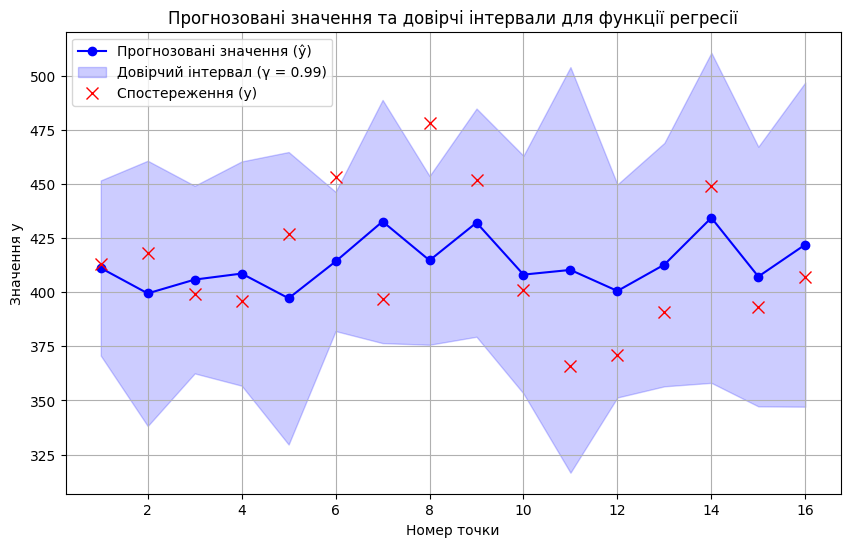

In [34]:
# Візуалізація
points = np.arange(1, len(y) + 1)  # Номери точок (1-16)

plt.figure(figsize=(10, 6))
plt.plot(points, y_pred, 'o-', label='Прогнозовані значення (ŷ)', color='blue')
plt.fill_between(points, ci_lower, ci_upper, color='blue', alpha=0.2, label='Довірчий інтервал (γ = 0.99)')
plt.plot(points, y, 'x', label='Спостереження (y)', color='red', markersize=8)
plt.xlabel('Номер точки')
plt.ylabel('Значення y')
plt.title('Прогнозовані значення та довірчі інтервали для функції регресії')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
r2 = r2_score(y, y_pred)

R = np.sqrt(r2)

print(f"\nКоефіцієнт множинної кореляції Пірсона R = {R:.4f}")


Коефіцієнт множинної кореляції Пірсона R = 0.3713


In [50]:
r2

0.13786302480011403